# Build Futures 

In [5]:
import pandas as pd
import numpy as np
from xbbg import blp

import string

import sys
sys.path.insert(0, '../cmds')
from utils import *
from portfolio import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

# Futures Contracts

In [6]:
TYPE = 'Comdty'
CODES = ['CL','NG','GC','LA','KC','C ','LC','LH']
bbcodes = [f'{code}A {TYPE}' for code in CODES]

CODES_INDEX = ['ES','NK']
bbcodes += [f'{code}A Index' for code in CODES_INDEX]

CODES_CURNCY = ['BP','BTC']
bbcodes += [f'{code}A Curncy' for code in CODES_CURNCY]

FLDS = ['ID_EXCH_SYMBOL','NAME','SECURITY_TYP','FUTURES_CATEGORY','DERIVATIVE_DELIVERY_TYPE','FUT_EXCH_NAME_LONG','FUT_CONTRACT_DT',
        'FUT_CONT_SIZE', 'LAST_PRICE','CONTRACT_VALUE', 'CRNCY', 'FUT_SEC_SPEC_ML',
        'FUT_TICK_SIZE','FUT_TICK_VAL',        
        'OPEN_INT','VOLUME','VOLUME_AVG_10D']

futures_info = blp.bdp(bbcodes,FLDS)
futures_info.rename(columns={'fut_tick_size':'tick size', 
                             'fut_tick_val':'tick value', 
                             'fut_cont_size':'contract size', 
                             'contract_value':'contract value', 
                             'fut_contract_dt':'contract date',                              
                             'fut_sec_spec_ml':'margin limit', 
                             'open_int':'open interest', 
                             'volume_avg_10d':'volume 10d avg', 
                             'derivative_delivery_type':'delivery type', 
                             'security_typ':'type',
                             'futures_category':'category',
                             'id_exch_symbol':'symbol',
                             'fut_exch_name_long':'exchange'}, inplace=True)

In [7]:
futures_info.index.name = 'bb ticker'
futures_info = futures_info.loc[bbcodes,:]
futures_info = futures_info.reset_index().set_index('symbol')

futures_info[['contract date']] = futures_info[['contract date']].astype('datetime64[ns]')
futures_info[['contract size','open interest','volume']] = futures_info[['contract size','open interest','volume']].astype(float)
futures_info

C:\Users\markhendricks\AppData\Local\Temp\ipykernel_980\4042367797.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  futures_info[['contract date']] = futures_info[['contract date']].astype('datetime64[ns]')


,bb ticker,name,type,category,delivery type,exchange,contract date,contract size,last_price,contract value,crncy,margin limit,tick size,tick value,open interest,volume,volume 10d avg
symbol,,,,,,,,,,,,,,,,,
CL,CLA Comdty,WTI CRUDE FUTURE Aug23,Physical commodity future.,Crude Oil,PHYS,New York Mercantile Exchange,2023-08-01,1000.0,74.28,74280.0,USD,5800.0,0.01,10.0,138498.0,179262.0,347826.2
NG,NGA Comdty,NATURAL GAS FUTR Aug23,Physical commodity future.,Natural Gas,PHYS,New York Mercantile Exchange,2023-08-01,10000.0,2.518,25180.0,USD,4000.0,0.001,10.0,108685.0,73519.0,125200.7
GC,GCA Comdty,GOLD 100 OZ FUTR Aug23,Physical commodity future.,Precious Metal,PHYS,"Commodity Exchange, Inc.",2023-08-01,100.0,1958.4,195840.0,USD,8300.0,0.1,10.0,240346.0,143910.0,214421.1
AH,LAA Comdty,LME PRI ALUM FUTR Aug23,Physical commodity future.,Base Metal,PHYS,London Metal Exchange,2023-08-01,25.0,2250.0,56250.0,USD,NaN,0.01,0.25,53232.0,49557.0,34346.7
KC,KCA Comdty,COFFEE 'C' FUTURE Sep23,Physical commodity future.,Foodstuff,PHYS,ICE Futures US Softs,2023-09-01,37500.0,155.6,58350.0,USD,6750.0,0.05,18.75,91530.0,21065.0,17368.4
ZC,C A Comdty,CORN FUTURE Dec23,Physical commodity future.,Corn,PHYS,Chicago Board of Trade,2023-12-01,5000.0,507.25,25362.5,USD,2300.0,0.25,12.5,564960.0,127573.0,178648.7
LE,LCA Comdty,LIVE CATTLE FUTR Oct23,Physical commodity future.,Livestock,PHYS,Chicago Mercantile Exchange,2023-10-01,40000.0,181.85,72740.0,USD,1850.0,0.025,10.0,133247.0,26890.0,26848.3
HE,LHA Comdty,LEAN HOGS FUTURE Oct23,Physical commodity future.,Livestock,CASH,Chicago Mercantile Exchange,2023-10-01,40000.0,82.975,33190.0,USD,1750.0,0.025,10.0,72754.0,13205.0,19510.1
ES,ESA Index,S&P500 EMINI FUT Sep23,Physical index future.,Equity Index,CASH,Chicago Mercantile Exchange,2023-09-01,50.0,4551.75,227587.5,USD,11200.0,0.25,12.5,2241106.0,599105.0,1406809.7


# Futures Time-Series

In [8]:
TICKS = ['CL','GC']
MONTHS = ['G','J','M','Q']
YR = '3'

FLDS = ['LAST_PRICE','OPEN_INT','VOLUME']
bbcalls = list()
for tick in TICKS:
    bbcalls += [f'{tick}{month}{YR} Comdty' for month in MONTHS]
    
futures_ts = blp.bdh(bbcalls, FLDS, start_date='2018-01-01',end_date='2023-06-30')

In [9]:
futures_ts.index = pd.to_datetime(futures_ts.index)
futures_ts.index.name = 'date'

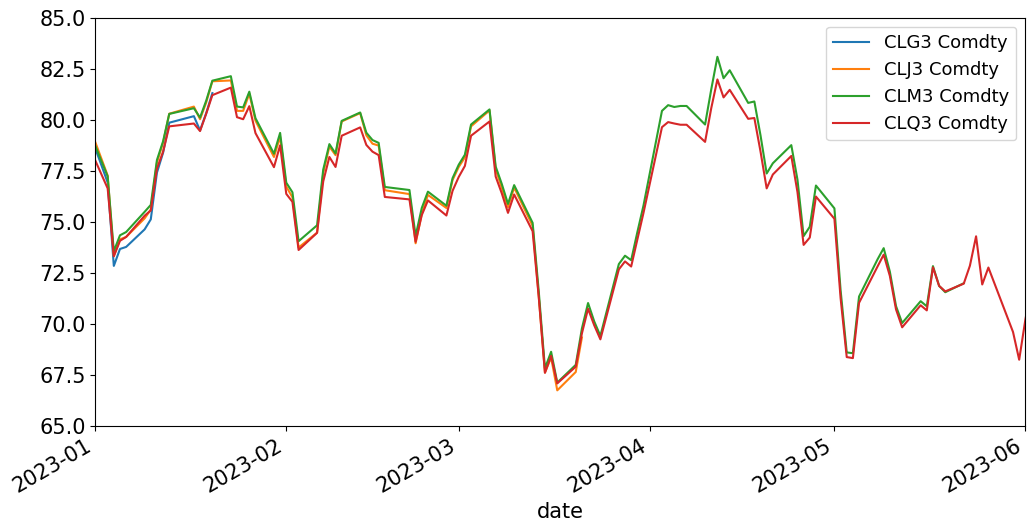

In [12]:
futures_ts.swaplevel(axis=1)['LAST_PRICE'].iloc[:,0:4].plot(xlim=('2023-01','2023-06'),ylim=(65,85));

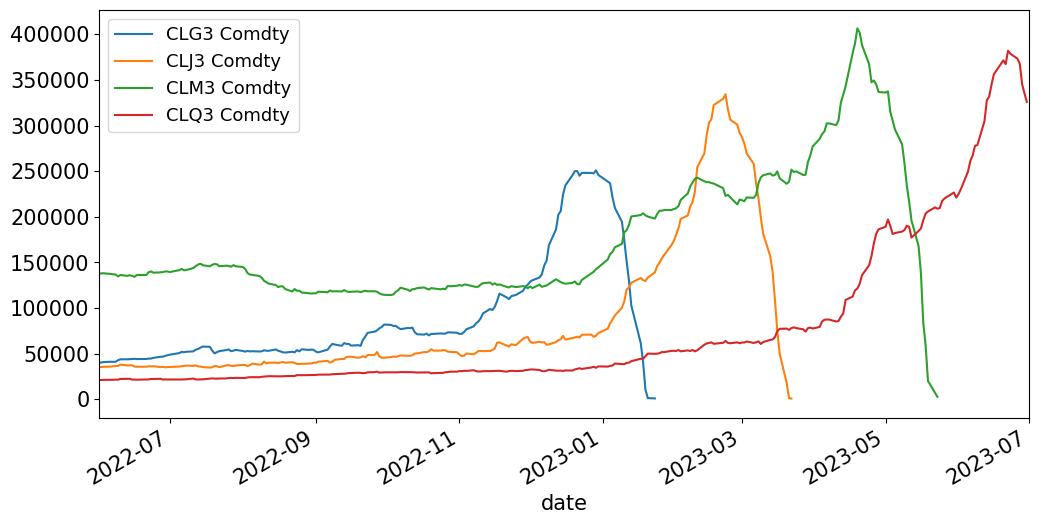

In [13]:
futures_ts.swaplevel(axis=1)['OPEN_INT'].iloc[:,0:4].plot(xlim=('2022-06','2023-07'));

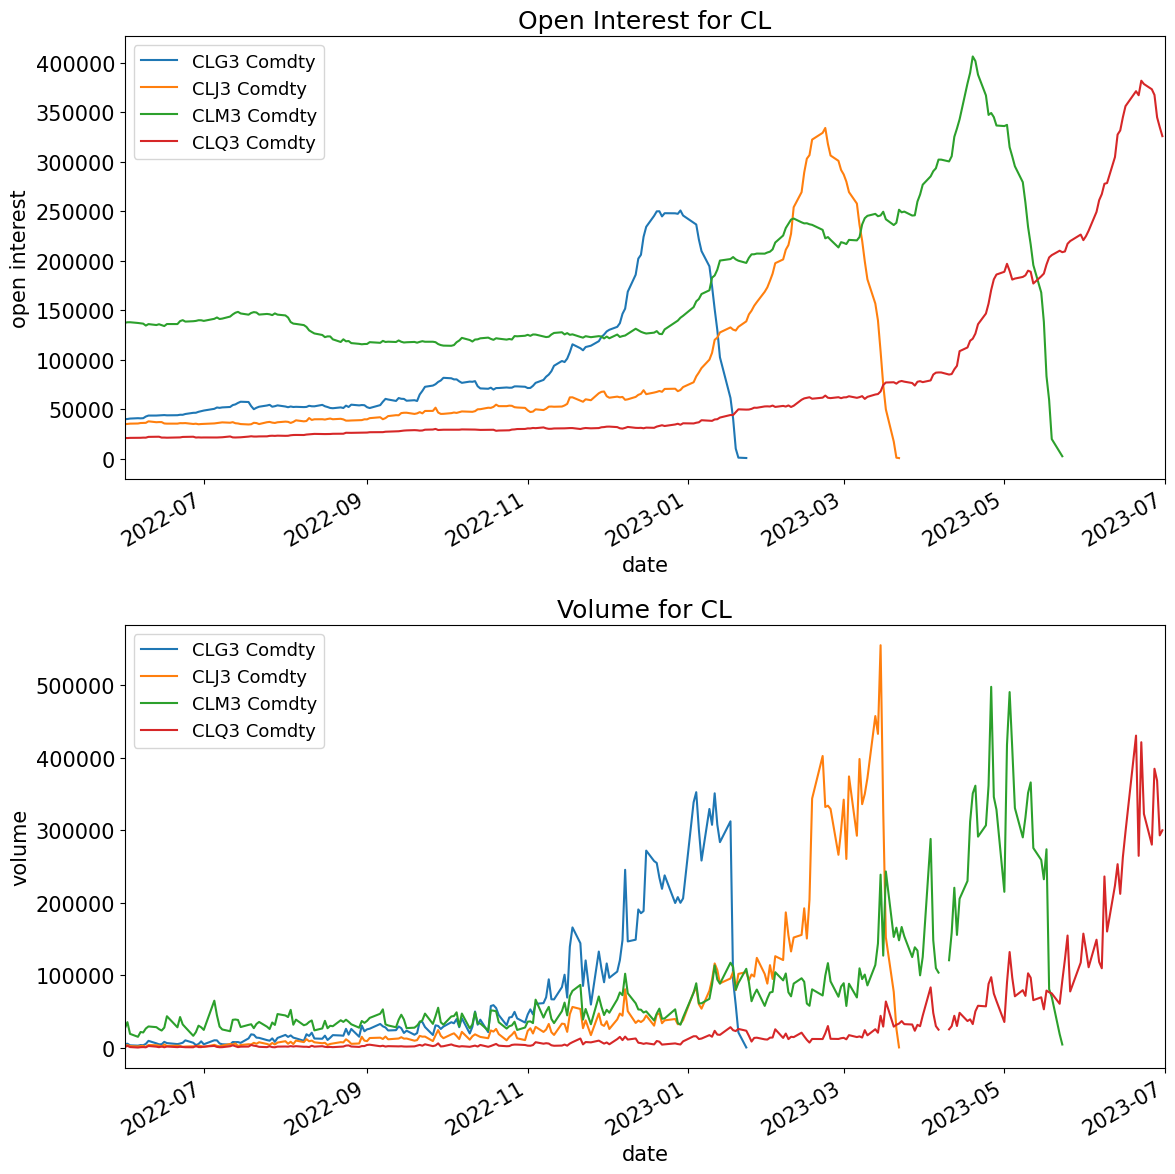

In [14]:
fig, ax = plt.subplots(2,1,figsize=(12,12))
futures_ts.swaplevel(axis=1)['OPEN_INT'].iloc[:,0:4].plot(ax=ax[0],xlim=('2022-06','2023-07'),title=f'Open Interest for {TICKS[0]}',ylabel='open interest')
futures_ts.swaplevel(axis=1)['VOLUME'].iloc[:,0:4].plot(ax=ax[1],xlim=('2022-06','2023-07'),title=f'Volume for {TICKS[0]}',ylabel='volume')
plt.tight_layout()
plt.show()

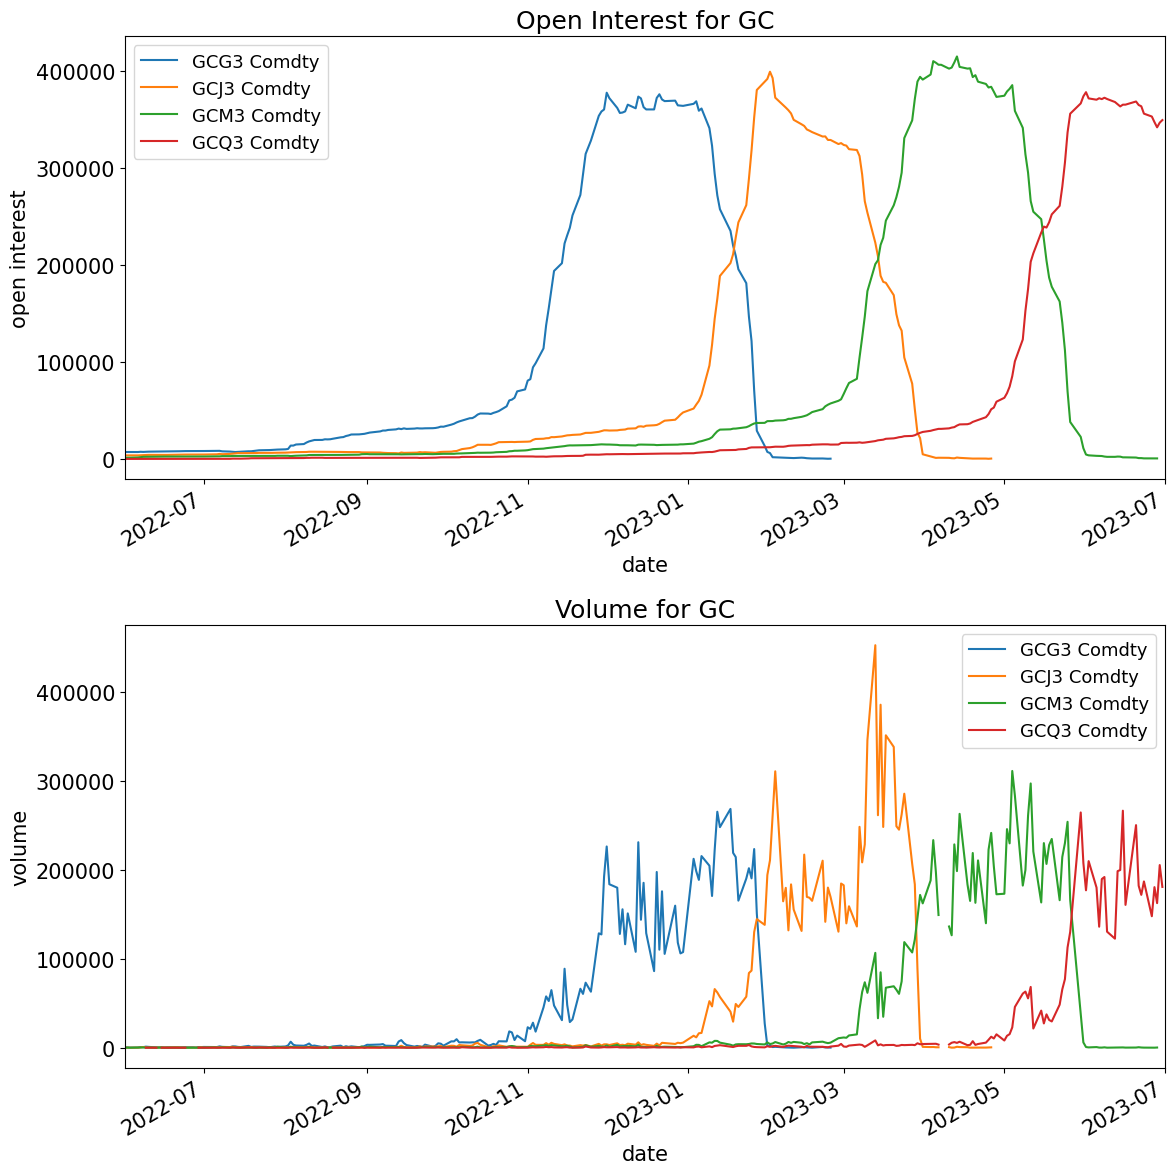

In [15]:
fig, ax = plt.subplots(2,1,figsize=(12,12))
futures_ts.swaplevel(axis=1)['OPEN_INT'].iloc[:,4:].plot(ax=ax[0],xlim=('2022-06','2023-07'),title=f'Open Interest for {TICKS[1]}',ylabel='open interest')
futures_ts.swaplevel(axis=1)['VOLUME'].iloc[:,4:].plot(ax=ax[1],xlim=('2022-06','2023-07'),title=f'Volume for {TICKS[1]}',ylabel='volume')
plt.tight_layout()
plt.show()

# Continuous Futures Adjustments

In [16]:
TICK = 'CL'
TYPE = 'Comdty'

ROLLS = ['B:00_0_R', 'B:00_0_D', 'B:00_0_W']
ROLLLABS = ['Ratio','Difference','Weighted Avg']

STARTDATE = '2010-01-01'
ENDDATE = '2023-06-30'
FLDS = 'last_price'

In [17]:
bbticks_comp = [f'{TICK}1 {TYPE}', f'{TICK}2 {TYPE}']

for roll in ROLLS:
    bbticks_comp.append(f'{TICK}1 {roll} {TYPE}')
    
data_comp = blp.bdh(tickers=bbticks_comp, flds=FLDS, start_date=STARTDATE,
                     end_date=ENDDATE)

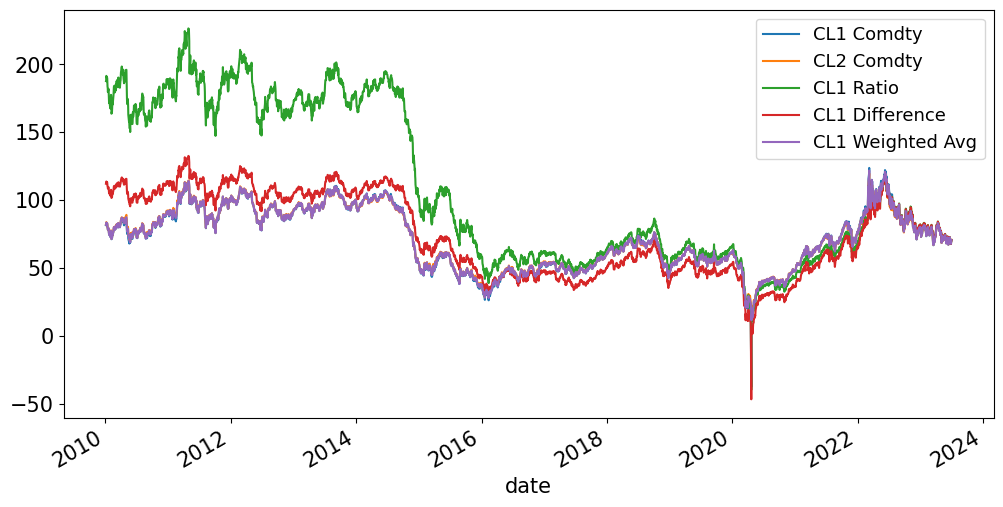

In [18]:
data_comp = data_comp.droplevel(level=1,axis=1)

data_comp.index = pd.to_datetime(data_comp.index)
data_comp.index.name = 'date'
data_comp.columns = [f'{TICK}1 {TYPE}', f'{TICK}2 {TYPE}'] + [f'{TICK}1 {rolllab}' for rolllab in ROLLLABS]

data_comp.plot();

In [19]:
px = data_comp.copy()
px[px<0] = np.nan
px[px==np.inf] = np.nan
rx = px.pct_change()
performanceMetrics(rx,annualization=252).style.format('{:.2%}')

,Mean,Vol,Sharpe,Min,Max
CL1 Comdty,8.84%,43.93%,20.12%,-45.21%,37.66%
CL2 Comdty,8.80%,45.40%,19.38%,-43.37%,78.82%
CL1 Ratio,2.30%,42.90%,5.36%,-45.23%,25.07%
CL1 Difference,37.30%,100.65%,37.06%,-89.78%,235.11%
CL1 Weighted Avg,7.77%,41.69%,18.64%,-30.71%,24.37%


# Continuous Futures Data

In [20]:
STARTDATE = '2000-01-01'
ENDDATE = '2023-06-30'

ADJ = 'B:00_0_R'
ADJLAB = 'roll=ratio'

bbcodes_adj = [f'{code}1 {ADJ} {TYPE}' for code in CODES]
bbcodes_adj += [f'{code}1 {ADJ} Index' for code in CODES_INDEX]
bbcodes_adj += [f'{code}1 Curncy' for code in CODES_CURNCY]

futures_hist = blp.bdh(bbcodes_adj,'PX_LAST',start_date=STARTDATE,end_date=ENDDATE)

In [21]:
prices = futures_hist.droplevel(level=1,axis=1)
prices.columns = [col.split()[0] for col in prices.columns]
prices.index.name = 'date'

,ES1,NK1,BP1,BTC1
date,,,,
2000-01-03,1555.39,NaN,163.94,NaN
2000-01-04,1497.07,13920.0,163.72,NaN
2000-01-05,1498.92,13473.0,164.20,NaN
2000-01-06,1488.85,13121.0,164.76,NaN
2000-01-07,1547.97,13319.0,163.86,NaN
...,...,...,...,...
2023-06-26,4370.25,32650.0,127.24,30315.00
2023-06-27,4418.75,32570.0,127.55,30705.00
2023-06-28,4417.50,33140.0,126.52,30110.00


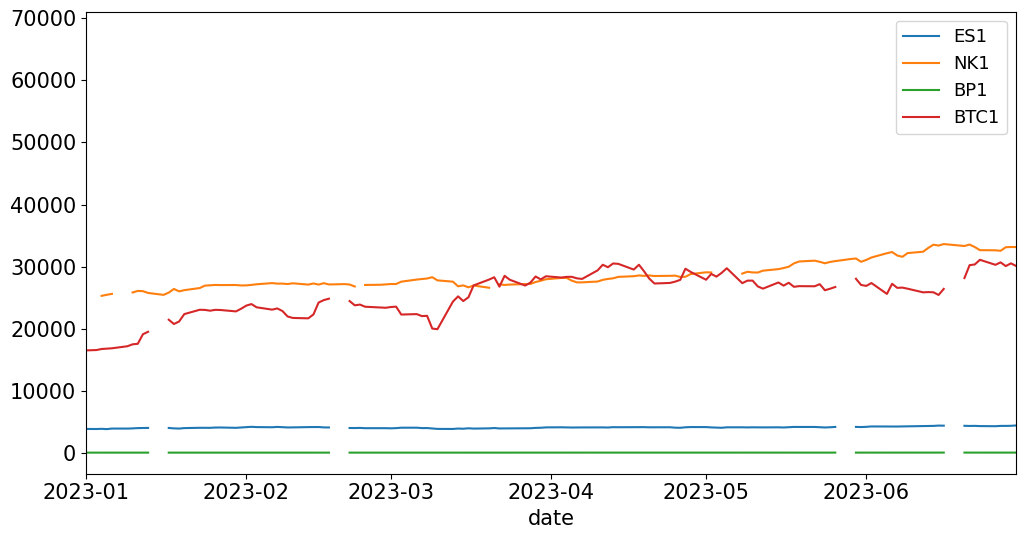

In [22]:
display(prices)
prices.plot(xlim=('2023-01-01','2023-06-30'));

# Futures Curves

In [23]:
bbtick_chain = ['CL1 Comdty','GC1 Comdty']
chain = blp.bds(bbtick_chain,'FUT_CHAIN')

pd_chain = chain.reset_index().set_index('security_description')
list_curves = pd_chain['index'].unique()

FLDS_CURVE = ['FUT_DLV_DT_FIRST','PX_LAST','OPEN_INT']

YRS = 3
SPARSE = 2


curves = dict()

for curve in list_curves:
    if curve == 'CL1 Comdty':
        bb_lookup = pd_chain[pd_chain['index']==curve].iloc[0:YRS*12:SPARSE].index
    elif curve == 'GC1 Comdty':
        bb_lookup = pd_chain[pd_chain['index']==curve].iloc[0:20:SPARSE].index

    curves[curve] = blp.bdp(bb_lookup,FLDS_CURVE).sort_values('fut_dlv_dt_first')
    curves[curve].rename(columns={'fut_dlv_dt_first':'delivery date','open_int':'open interest','px_last':'price'},inplace=True)
    curves[curve][['price','open interest']] = curves[curve][['price','open interest']].astype(float)
    curves[curve].index.name = 'ticker'    

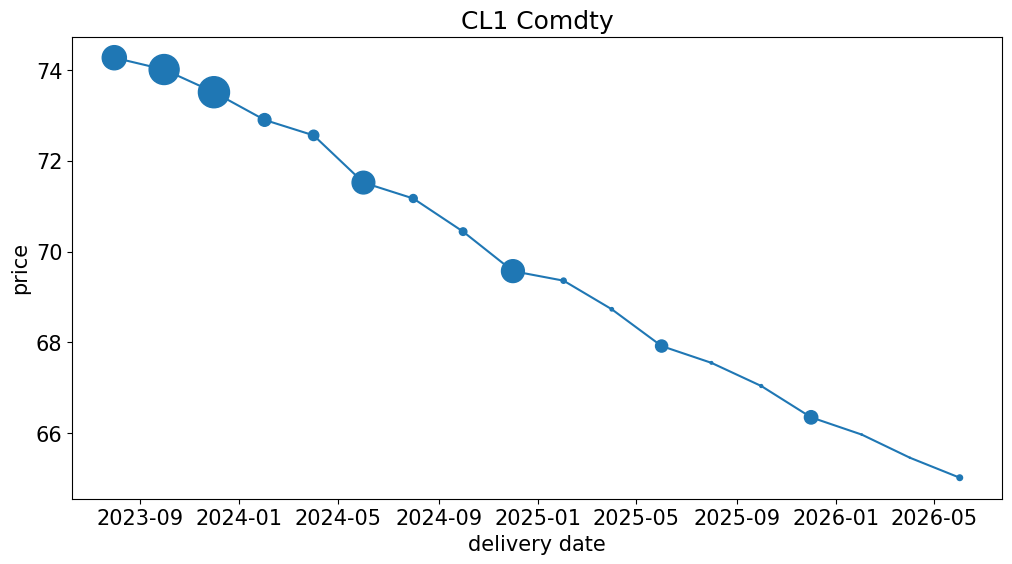

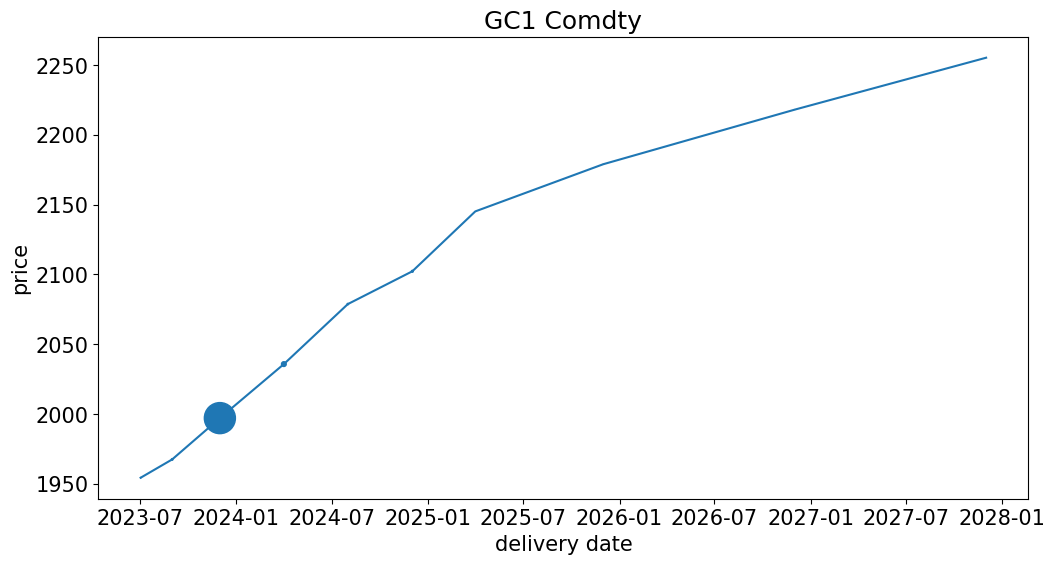

In [24]:
for comdty in list_curves:
    
    temp = curves[comdty].set_index('delivery date').sort_index()
    msize = (temp['open interest']/temp['open interest'].max()) * 500
    
    fig, ax=plt.subplots()
    temp['price'].plot(ax=ax,marker=None,title=comdty)
    temp.reset_index().plot.scatter('delivery date','price',s=msize,ax=ax,title=comdty)
    plt.show()

# Export Data

In [26]:
OUTFILE = f'../data/futures_data_2023.xlsx'

with pd.ExcelWriter(OUTFILE) as writer:  

    futures_info.to_excel(writer, sheet_name= f'futures contracts', index=True)

    futures_ts.to_excel(writer, sheet_name= f'futures timeseries', index=True)    
    
    data_comp.to_excel(writer, sheet_name= f'roll conventions {TICK}', index=True)        
    
    prices.to_excel(writer, sheet_name= f'continuous futures {ADJLAB}', index=True)    
    
    for comdty in list_curves:
        temp = curves[comdty].sort_values('delivery date')
        temp.to_excel(writer, sheet_name= f'curve {comdty.split()[0]}', index=True)        